In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('./highly_conf.csv')
df.columns = ['index', 'text', 'label', 'gender']
df.head(1)

,index,text,label,gender
0,0,"[CLS] do you want a gaming PC? [SEP] Yes, yes ...",n,M


In [34]:
df['predictions'] = [ i.strip() for i in open('predictions_highly_conf.txt', 'rt')][1:]

In [35]:
df.groupby('gender').count()

,index,text,label,predictions
gender,,,,
M,7702,7702,6768,7702
W,6000,6000,0,6000


In [55]:
balanced = pd.concat([df[df.gender == 'M'].sample(250), df[df.gender == 'W'].sample(250)])
balanced.groupby('gender').count()

,index,text,label,predictions
gender,,,,
M,250,250,226,250
W,250,250,0,250


In [56]:
balanced

,index,text,label,gender,predictions
6020,6020,[CLS] Does anybody else hate the trend of all ...,n,M,f
1326,1326,[CLS] Isnt Hillary the exact opposite of what ...,n,M,n
4659,4659,[CLS] Do I want Trump as president? [SEP] You ...,n,M,n
3001,3001,[CLS] Dont you guys already have a way to capt...,n,M,n
5955,5955,[CLS] Does the player development engine take ...,n,M,f
...,...,...,...,...,...
11256,11294,[CLS] Are you seriously arguing the National L...,NaN,W,n
9855,9893,[CLS] Do you remember that thing you said on y...,NaN,W,n
8463,8501,[CLS] Do you happen to live in a cat tv drama?...,NaN,W,f
8156,8194,[CLS] Dont you think things would have turned ...,NaN,W,n


In [59]:
balanced['question'] = balanced.text.apply(lambda x: x[5:x.index('[SEP]')])
balanced['response'] = balanced.text.apply(lambda x: x[x.index('[SEP]')+6:-6])
balanced[['question', 'response', 'gender', 'predictions']]

,question,response,gender,predictions
6020,Does anybody else hate the trend of all these...,Why no?,M,f
1326,Isnt Hillary the exact opposite of what Sande...,This guy has been a troll for a month now.,M,n
4659,Do I want Trump as president?,You think your country voted for him?,M,n
3001,Dont you guys already have a way to capture c...,"Not the Xbox ones, since it's not up yet. Not ...",M,n
5955,Does the player development engine take into ...,We hope so as that is probably what makes the ...,M,f
...,...,...,...,...
11256,Are you seriously arguing the National Librar...,"You have a right to your opinion, and I've nev...",W,n
9855,Do you remember that thing you said on your w...,I don't even think I remember that lol,W,n
8463,Do you happen to live in a cat tv drama?,I do!,W,f
8156,Dont you think things would have turned out d...,I would like to see why you think that. But I ...,W,n


In [61]:
balanced[['question', 'response', 'gender', 'predictions']].to_csv('highly_conf_balanced.csv', sep='\t', index=False)

### Statistical test

In [27]:
for i, group in balanced.groupby('gender'):
    print(i)
    print(group['predictions'].value_counts())

M
n    314
f    171
p     15
Name: predictions, dtype: int64
W
n    283
f    214
p      3
Name: predictions, dtype: int64


-43


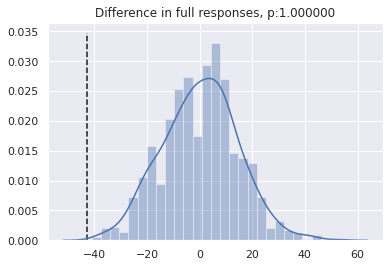

In [31]:
trials = 1000

test_statistic = len(balanced[(balanced.gender == 'M') & (balanced['predictions'] == 'f')]) - len(balanced[(balanced.gender == 'W') & (balanced['predictions'] == 'f')])
print(test_statistic)

v = []
for i in range(0, trials):
    balanced['label'] = np.random.permutation(balanced['gender'].tolist())
    statistic = len(balanced[(balanced.label == 'M') & (balanced['predictions'] == 'f')]) - len(balanced[(balanced.label == 'W') & (balanced['predictions'] == 'f')])
    v.append(statistic)
    
diffs = np.array(v)
p_value = sum(np.abs(diffs) > test_statistic) / trials
    
plt.figure()
plt.title('Difference in full responses, p:%f' % (p_value))
ax = sns.distplot(diffs)
ymin, ymax = ax.get_ylim()
ax.vlines(test_statistic, ymin, ymax, linestyle='--')